# A model to learn the `sine` function

The goal of this task is to develop a QML model and use it to learn the sine function on the primary interval $[0, 2\pi]$ and reproduce the values of the sine function.

A simple outline of the procedure that will be followed:

1. Discretizing the primary interval and use these data-points as labels for the `sine` function.
2. Implement a QML (in this case, we will implement a variational quantum circuit) model which reproduces the values of the `sine` function. 

## Installing and Importing the required libraries

In [1]:
# %pip install pennylane

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Discretization

Discretizing the interval $[0, 2\pi]$ with $\text{num\_points} = 100$

In [3]:
num_points = 25
x_label = np.linspace(0, 2*np.pi, num_points)
y_label = np.sin(x_label)

## Quantum Machine Learning Model

In [4]:
num_qubits = 1
num_layers = 3

In [5]:
dev = qml.device("default.qubit", wires=num_qubits)

### Variational Quantum Circuit

In [6]:
@qml.qnode(dev)
def qc(params, x):
    qml.RX(x, wires=0)
    for i in range(num_layers):
        qml.RY(params[i], wires=0)
        qml.RZ(params[i + num_layers], wires=0)
    return qml.expval(qml.PauliZ(0))

### Initializing the parameters

In [7]:
params = np.random.random(2 * num_layers, requires_grad=True)

### Cost Function

In [8]:
def cost(params, x_values, y_values):
    predictions = [qc(params, x) for x in x_values]
    return np.mean((np.array(predictions) - y_values) ** 2)

### Training the Model

In [9]:
opt = qml.GradientDescentOptimizer(stepsize=0.1) # Gradient descent optimizer

epochs = 2 # Number of iterations of the optimization loop

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for i, x in enumerate(x_label):
        params, cost_val = opt.step_and_cost(lambda v: cost(v, x_label, y_label), params)
        print(f"Step {i + 1}/{len(x_label)} - Cost: {cost_val}")

    print(f"Epoch {epoch}: Cost = {cost_val}")

print("Training successfully completed!!")

Epoch 1/2
Step 1/25 - Cost: 1.353396997229381
Step 2/25 - Cost: 1.2787158907302791
Step 3/25 - Cost: 1.21050231070399
Step 4/25 - Cost: 1.1492731632156967
Step 5/25 - Cost: 1.0943294953699738
Step 6/25 - Cost: 1.0441397056689354
Step 7/25 - Cost: 0.9966538100877148
Step 8/25 - Cost: 0.9494948892298738
Step 9/25 - Cost: 0.9000643996839223
Step 10/25 - Cost: 0.8456466249478797
Step 11/25 - Cost: 0.783625153448146
Step 12/25 - Cost: 0.711930000481856
Step 13/25 - Cost: 0.629773816651877
Step 14/25 - Cost: 0.5385368090854974
Step 15/25 - Cost: 0.4423248167195571
Step 16/25 - Cost: 0.34751974761108867
Step 17/25 - Cost: 0.26105124540122543
Step 18/25 - Cost: 0.18815052451544192
Step 19/25 - Cost: 0.13096724182732447
Step 20/25 - Cost: 0.08873882394761093
Step 21/25 - Cost: 0.0589738216477276
Step 22/25 - Cost: 0.038690368649463486
Step 23/25 - Cost: 0.02518689613489746
Step 24/25 - Cost: 0.016335949673847057
Step 25/25 - Cost: 0.010592851764971436
Epoch 0: Cost = 0.010592851764971436
Epoch 

## Results

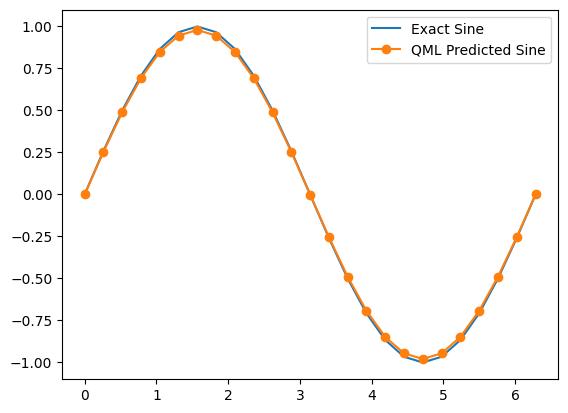

In [10]:
preds = [qc(params, x) for x in x_label]

# Plot the results
plt.plot(x_label, y_label, label="Exact Sine")
plt.plot(x_label, preds, 'o-', label="QML Predicted Sine")
plt.legend()
plt.show()

## Summary

In this task, we managed to develop our own QML model which reproduces/approximates the `sine` function by following the steps listed at the start of the notebook.

**&copy; Harsh Sanjay Roniyar, 2024**